In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

In [60]:
data = pd.read_csv("C://Work//GDrive//Online Course to Teach//Python//Data Analytics with Python//Class Notes and Assignments//house.csv")


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
SNO            7 non-null int64
Square_Feet    7 non-null int64
Price          7 non-null int64
dtypes: int64(3)
memory usage: 248.0 bytes


In [62]:
# Initialize the linear regression class.
regressor = linear_model.LinearRegression()


In [63]:
# We're using Square_Feet' as  predictor, and making predictions for 'Price'.
# The predictors need to be in a dataframe.
# We pass in a list when we select predictor columns from "data" to force pandas not to generate a series.
predictors = data[["Square_Feet"]]
to_predict = data["Price"]


In [29]:
# Train the model using the training set
regressor.fit(predictors, to_predict)

# Check R-Squared
regressor.score(predictors, to_predict)

0.94466858603594295

In [30]:
#Equation coefficient and Intercept
print('Coefficient: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_)

Coefficient: 
 [ 28.77659574]
Intercept: 
 1771.80851064


In [31]:
#Predict Output. lets say we want to predict the house price whose square_feet area is 700
predicted= regressor.predict(700)

In [32]:
print(predicted)

[ 21915.42553191]


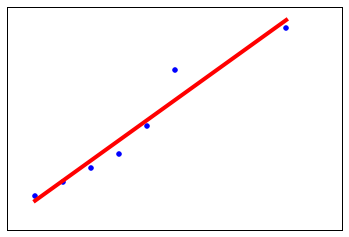

In [33]:
plt.scatter(predictors,to_predict,color='blue')
plt.plot(predictors,regressor.predict(predictors),color='red',linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

In [8]:
# using mtcars
from ggplot import mtcars
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

A data frame with 32 observations on 11 variables.

mpg	     - Miles/(US) gallon

cyl	     - Number of cylinders

disp	 - Displacement (cu.in.)

hp	     - Gross horsepower

drat	 - Rear axle ratio

wt	     - Weight (1000 lbs)

qsec	 - 1/4 mile time

vs	     - V/S

am	     - Transmission (0 = automatic, 1 = manual)

gear	 - Number of forward gears

carb	 - Number of carburetors

In [10]:
mtcars.head(10)

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


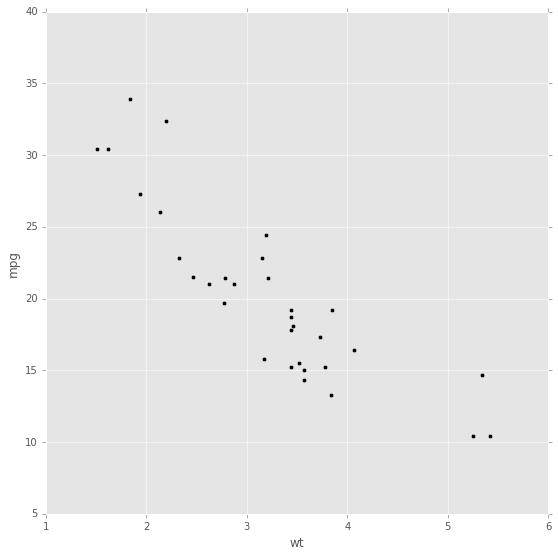

In [9]:
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black")

In [26]:

# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = mtcars[["wt"]], 
                     y = mtcars["mpg"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

37.2851261673
[-5.34447157]


The best fit line is:

mpg = 37.2851 - 5.3445*wt

In [27]:
regression_model.score(X = mtcars[["wt"]], 
                       y = mtcars["mpg"])

0.75283279365826461

In this case, car weight explains roughly 75% of the variance in mpg.

In [28]:
# Prediction

train_prediction = regression_model.predict(X = mtcars[["wt"]])

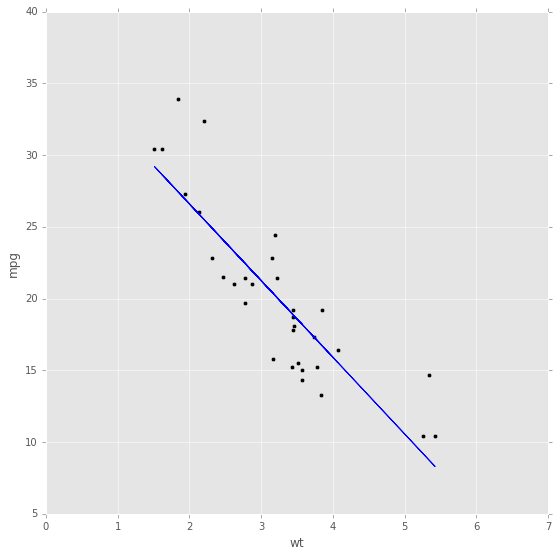

In [15]:
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot regression line
plt.plot(mtcars["wt"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue")

as car weight increases we would expect fuel economy to decline.

In [18]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(train_prediction, mtcars["mpg"])**0.5

RMSE

2.9491626859550282

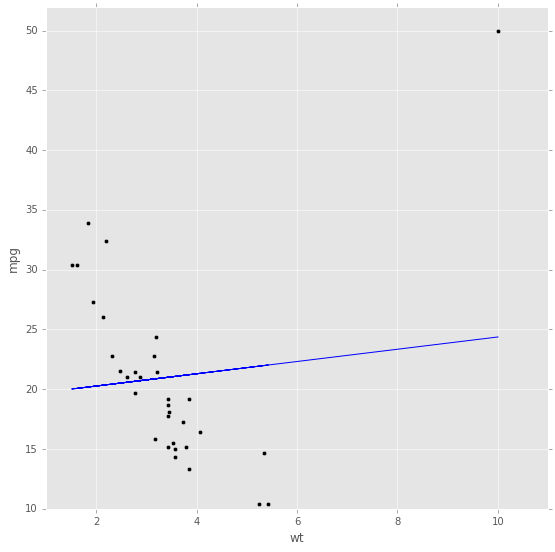

In [16]:
# Effect of Outliers

mtcars_subset = mtcars[["mpg","wt"]]

super_car = pd.DataFrame({"mpg":50,"wt":10}, index=["super"])

new_cars = mtcars_subset.append(super_car)

# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the new_cars data
regression_model.fit(X = pd.DataFrame(new_cars["wt"]), 
                     y = new_cars["mpg"])

train_prediction2 = regression_model.predict(X = pd.DataFrame(new_cars["wt"]))

# Plot the new model
new_cars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black", xlim=(1,11), ylim=(10,52))

# Plot regression line
plt.plot(new_cars["wt"],     # Explanatory variable
         train_prediction2,  # Predicted values
         color="blue")

<B>Polynomial regression</B>

In [31]:
# Initialize model
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = pd.DataFrame([mtcars["wt"],           # Include weight
                           mtcars["wt"]**2]).T     # Include weight squared

# Train the model using the new_cars data
poly_model.fit(X = predictors, 
               y = mtcars["mpg"])

# Check trained model y-intercept
print("Model intercept")
print(poly_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print("Model Coefficients")
print(poly_model.coef_)

# Check R-squared
poly_model.score(X = predictors, 
                 y = mtcars["mpg"])

Model intercept
49.9308109495
Model Coefficients
[-13.38033708   1.17108689]


0.81906135813840952

Including the weight squared term appears to improve the model's performance because the R-squared increased from 0.75 to 0.8190. It should be noted, however, that adding more variables to a linear regression model can never cause R-squared to decrease, so we only want to add variables if there is a substantial improvement in performance.

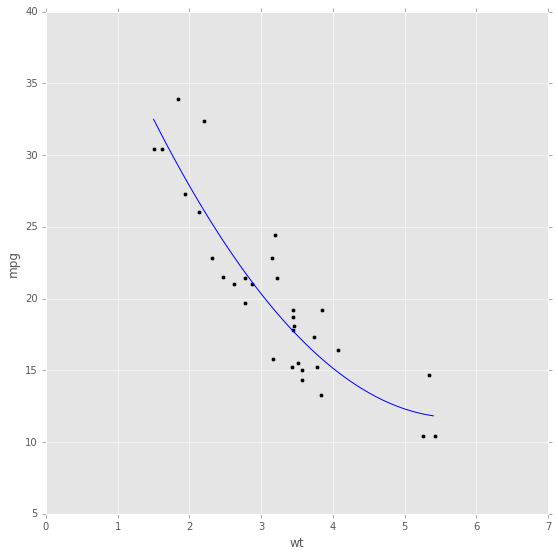

In [48]:
# Plot the curve from 1.5 to 5.5
poly_line_range = np.arange(1.5, 5.5, .1)

# Get first and second order predictors from range
poly_predictors = pd.DataFrame([poly_line_range,
                               poly_line_range**2]).T

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot curve line
plt.plot(poly_line_range,   # X-axis range
         y_values,          # Predicted values
         color="blue")

In [50]:
from sklearn.metrics import mean_squared_error

preds = poly_model.predict(X=predictors)

RMSE = mean_squared_error(preds, mtcars["mpg"])**0.5

RMSE

2.5233004724610786

Since the RMSE of the quadratic model is lower than the old one and the adjusted R-squared is higher, it is probably a better model. We do, however, have to be careful about overfitting the training data.
Overfitting describes a situation where our model fits the data we use to create it (training data) too closely, resulting in poor generalization to new data. This is why we generally don't want to use training data to evaluate a model: it gives us a biased, usually overly optimistic evaluation. One of the strengths of first and second order linear regression is that they are so simple, they are unlikely to overfit data very much. The more complex the model we create and the more freedom it has to fit the training data, the greater risk we run of overfitting. For example, we could keep including more polynomial terms in our regression model to fit the training data more closely and achieve lower RMSE scores against the training set, but this would almost certainly not generalize well to new data.

In [51]:
# Initialize model
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = pd.DataFrame([mtcars["wt"],           
                           mtcars["wt"]**2,
                           mtcars["wt"]**3,
                           mtcars["wt"]**4,
                           mtcars["wt"]**5,
                           mtcars["wt"]**6,
                           mtcars["wt"]**7,
                           mtcars["wt"]**8,
                           mtcars["wt"]**9,
                           mtcars["wt"]**10]).T     

# Train the model using the new_cars data
poly_model.fit(X = predictors, 
               y = mtcars["mpg"])

# Check trained model y-intercept
print("Model intercept")
print(poly_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print("Model Coefficients")
print(poly_model.coef_)

# Check R-squared
poly_model.score(X = predictors, 
                 y = mtcars["mpg"])

Model intercept
-14921.120656
Model Coefficients
[  6.45813583e+04  -1.20086135e+05   1.26931932e+05  -8.46598480e+04
   3.73155209e+04  -1.10334758e+04   2.16590409e+03  -2.70730550e+02
   1.94974165e+01  -6.15515447e-01]


0.8702106588235019

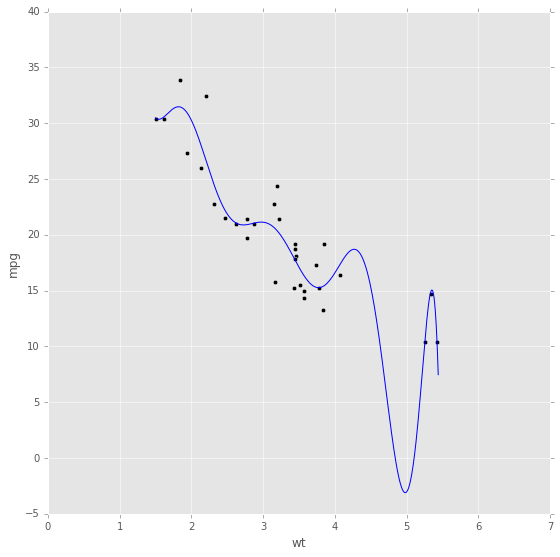

In [52]:
p_range = np.arange(1.5, 5.45, 0.01)

poly_predictors = pd.DataFrame([p_range, p_range**2, p_range**3,
                              p_range**4, p_range**5, p_range**6, p_range**7, 
                              p_range**8, p_range**9, p_range**10]).T  

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot curve line
plt.plot(p_range,   # X-axis range
         y_values,          # Predicted values
         color="blue")

<B>Multiple Linear regression</B>

In [54]:
# Initialize model
multi_reg_model = linear_model.LinearRegression()

# Train the model using the mtcars data
multi_reg_model.fit(X = mtcars.ix[:,["wt","hp"]], 
                     y = mtcars["mpg"])

# Check trained model y-intercept
print(multi_reg_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print(multi_reg_model.coef_)

# Check R-squared
multi_reg_model.score(X = mtcars.ix[:,["wt","hp"]], 
                      y = mtcars["mpg"])

37.2272701164
[-3.87783074 -0.03177295]


0.8267854518827914

In [56]:
# Initialize model
multi_reg_model = linear_model.LinearRegression()

# Include squared terms
poly_predictors = pd.DataFrame([mtcars["wt"],
                                mtcars["hp"],
                                mtcars["wt"]**2,
                                mtcars["hp"]**2]).T

# Train the model using the mtcars data
multi_reg_model.fit(X = poly_predictors, 
                    y = mtcars["mpg"])

# Check R-squared
print("R-Squared")
print( multi_reg_model.score(X = poly_predictors , 
                      y = mtcars["mpg"]) )

# Check RMSE
RMSE = mean_squared_error(multi_reg_model.predict(poly_predictors), mtcars["mpg"])**0.5

RMSE


R-Squared
0.890727954967


1.9609108134176985